# Operations on `DataFrame`s

As in the case of `Series` the Pandas `DataFrame` object has a large number of very useful methods. In the following we will study some of these and see how to use to extract information or how transform into a desired form. Through the technique of method chaining operations on `DataFrames` can be combined with the plotting functionalities which forms the basis of e.g. exploratory data analysis (EDA).

As usual, we start with some `import`s.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-colorblind")

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.1.1', Numpy version: np.__version__ = '1.26.0'"

In order to be coherent with previous sections we will again use the Iris dataset. But don't worry, we will deal with more interesting --- but also more complicated --- datasets soon.

In [2]:
df_iris = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=["sepal length", "sepal width", "petal length", "petal width", "species"],
)

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Statistics

The same methods we're already [familiar with](series-statistics) from the `Series` are of course also available for `DataFrame`s. There are, however, some subtle differences we have to highlight. While a `Series` just has a single "axis of operation" (along the rows) a `DataFrame` has *two*: the rows *and* the columns (this is the "new kid in town").

Let's start simple: We see what happens when we just call the [`.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) method on `df_iris`; but we will only sum the numerical data types. We also silently introduce another method with name [`.select_dtypes()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) that allows to include / exclude columns according to their `dtype`. We leave it to you to explore the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) of this method.

In [4]:
(
    df_iris
    .select_dtypes('number')
    .sum()
)

sepal length    876.5
sepal width     458.1
petal length    563.8
petal width     179.8
dtype: float64

We get a `Series` with the original column name as index labels, i.e., the result is the same as taking each column separately and summing its content.

In [6]:
pd.Series(
    {name: df_iris[name].sum() for name in df_iris.columns.difference(['species'])}
)

petal length    563.8
petal width     179.8
sepal length    876.5
sepal width     458.1
dtype: float64

To make things more explicit we use the `axis` parameter to state that we want to sum along the rows. While it is also possible to specify `axis=0` we feel that it is more expressive to use `"rows"`. 
Additionally, we also limit the summation to the numeric `dtype`s by setting `numeric_only=True`.

In [8]:
df_iris.sum(
    numeric_only=True,
    axis='rows'
)

sepal length    876.5
sepal width     458.1
petal length    563.8
petal width     179.8
dtype: float64

Conversely, summing along the *columns* yields another `Series` with the same number of rows as the original `DataFrame`.

In [9]:
df_iris.sum(
    numeric_only=True,
    axis='columns'
)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

The following sketch summarizes the differences for summing (reducing) along the rows or columns.

![Reducing along the rows or columns](../../_build_img/DataFrameReduceAxis-1.png)

Other methods like 

* [`.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html),
* [`.std()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)
* [`.var()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)
* [`.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html)
* [`.max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html)

work analogously. 

Multiple statistics can be computed with the [`.agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) method that we have already learned about when [discussing `Series`](series-statistics). Note how the index contains the names of the statistic functions while the column labels are those of the original `DataFrame`.

In [26]:
(
    df_iris
    .select_dtypes('number')
    .agg(
        ["mean", "median", "std"],
    )
)

,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054000,3.758667,1.198667
median,5.800000,3.000000,4.350000,1.300000
std,0.828066,0.433594,1.764420,0.763161


An interesting capability of this method is accept a dictionary that specifies a particular reduction per columns. This is best illustrated with an example: For the `"sepal length"` column we ask for the mean value, for the `"petal length"` column for the median values. Since there is just a single operation specified per column we get the results in a `Series`.

In [13]:
(
    df_iris
    .select_dtypes('number')
    .agg(
        {
            "sepal length": 'mean',
            "petal length": 'std'
        },
    )
)

sepal length    5.843333
petal length    1.764420
dtype: float64

Even more curiously, we can even specify a `list` of operations to be applied to a column. The result are now contained in a `DataFrame`. The `NaN` values in the columns stem from the fact that the operations are not the same for both columns.

In [21]:
(
    df_iris
    .select_dtypes('number')
    .agg(
        {
            "sepal length": ['mean', 'median'],
            "petal length": ['mean', 'std']
        },
    )
)

,sepal length,petal length
sum,876.5,NaN
median,5.8,NaN
var,NaN,3.113179
std,NaN,1.764420


To finishe this section we mention the [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method which gives a compact overview of basic statistics of a dataset.

In [15]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Quiz

<span style="display:none" id="7_DataFramesOperations:1">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGRvZXMgaXQgbWVhbiB0byBzdW0gYWxvbmcgYGF4aXMgPSAxYD8iLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJTdW0gYWxvbmcgdGhlIHJvd3MifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJTdW0gYWxvbmcgdGhlIGNvbHVtbnMifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiU3VtIGFsb25nIHRoZSByb3dzIGFuZCB0aGUgY29sdW1ucyJ9XX1d</span>

In [16]:
import jupyterquiz
jupyterquiz.display_quiz("#7_DataFramesOperations:1")

<IPython.core.display.Javascript object>

<span style="display:none" id="7_DataFramesOperations:2">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGlzIHRydWUgZm9yIHRoZSBtZWRpYW4gYW5kIHRoZSA1MCUgcGVyY2VudGlsZT8iLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiB0cnVlLCAiYW5zd2VyIjogIlRoZXJlIGlzIG5vIGRpZmZlcmVuY2UsIHRoZXkgYXJlIHRoZSBzYW1lLiJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJUaGUgbWVkaWFuIGlzIGFsd2F5cyBsYXJnZXIgdGhhbiB0aGUgNTAlIHBlcmNlbnRpbGUuIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIlRoZSA1MCUgcGVyY2VudGlsZSBpcyBhbHdheXMgbGFyZ2VyIHRoYW4gdGhlIG1lZGlhbi4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJCb3RoIGFyZSBhbHNvIGtub3duIGFzIHRoZSAybmQgcXVhcnRpbGUifV19XQ==</span>

In [17]:

jupyterquiz.display_quiz("#7_DataFramesOperations:2")

<IPython.core.display.Javascript object>

<span style="display:none" id="7_DataFramesOperations:3">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJHaXZlbiB0aGUgZnVsbCBgZGZfaXJpc2AgZnJvbSBhYm92ZS4gV2hpY2ggb2YgdGhlIGZvbGxvd2luZyBtZXRob2QgY2FsbHMgd2lsbCBub3QgdGhyb3cgYW4gZXJyb3IgKGEgYFR5cGVFcnJvcmAgdG8gYmUgcHJlY2lzZSk/IiwgImFuc3dlcnMiOiBbeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiZGZfaXJpcy5zdW0oKSJ9LCB7ImNvcnJlY3QiOiB0cnVlLCAiYW5zd2VyIjogIiAiLCAiY29kZSI6ICJkZl9pcmlzLnN1bShudW1lcmljX29ubHk9VHJ1ZSwgYXhpcz1cImNvbHVtbnNcIikifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiICIsICJjb2RlIjogImRmX2lyaXMubWVhbihheGlzPVwicm93c1wiKSJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiZGZfaXJpcy5hZ2coW1wibWVhblwiLCBcIm1lZGlhblwiXSkifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICIgIiwgImNvZGUiOiAiZGZfaXJpcy5kZXNjcmliZSgpIn1dfV0=</span>

In [18]:

jupyterquiz.display_quiz("#7_DataFramesOperations:3")

<IPython.core.display.Javascript object>

### Exercises

#### Variance

Compute the variance by for all numeric data columns

1. by calling a suitable `DataFrame` method, and
2. by passing a suitable `DataFrame` to the corresponding NumPy function,

and store result in a `Series` that has the names of the numeric columns as index.

Compare the output and modify one of the calls if the results are *not* the same.

In [32]:
(
    df_iris
    .var(
        numeric_only=True,
        axis='rows'
    )
)

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

In [35]:
pd.Series(
    data= df_iris.select_dtypes("number").to_numpy().std(axis=0, ddof=1) ** 2,
    index=df_iris.columns[:-1]
)

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

#### Percentiles

Come up with *two* different ways to compute the 25th, 50th, 75th and 100th percentile of each of the numeric columns.

In [37]:
(
    df_iris
    .select_dtypes('number')
    .quantile(
        [
            0.25,
            0.5,
            0.75,
            1
        ]
    )
)

,sepal length,sepal width,petal length,petal width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [39]:
(
    df_iris
    .describe()
    .loc[["25%", "50%", "75%", "max"]]
)

,sepal length,sepal width,petal length,petal width
25%,5.1,2.8,1.60,0.3
50%,5.8,3.0,4.35,1.3
75%,6.4,3.3,5.10,1.8
max,7.9,4.4,6.90,2.5


#### Reductions

Compute the mean and the median value for the sepal length, sepal width, petal length, and petal width columns. Visualise the results appropriately. Try to compute both statistics with a *single* method call.

*Hints*:
* No, the "right" way to plot this it *not* a line plot! :-)
* To plot mean and median per measured quantity side-by-side it may help to [`.transpose()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html).

,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054,3.758667,1.198667
median,5.800000,3.000,4.350000,1.300000


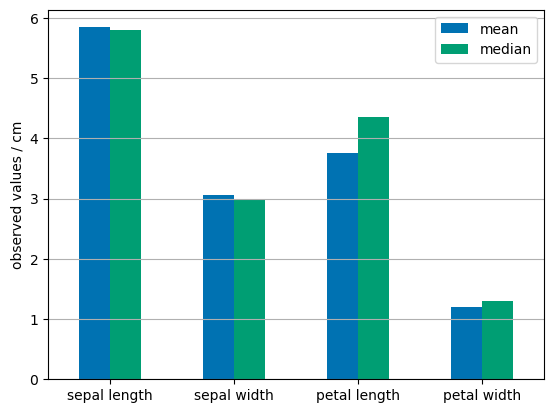

In [48]:
ax = (
    df_iris.select_dtypes('number')
    .agg(['mean', 'median'])
    .transpose()
    .plot.bar(
        ylabel="observed values / cm",
        rot=0
    )
).yaxis.grid(True)

df_iris.select_dtypes('number').agg(['mean', 'median'])

,median,mean
sepal length,5.80,5.843333
sepal width,3.00,3.054000
petal length,4.35,3.758667
petal width,1.30,1.198667


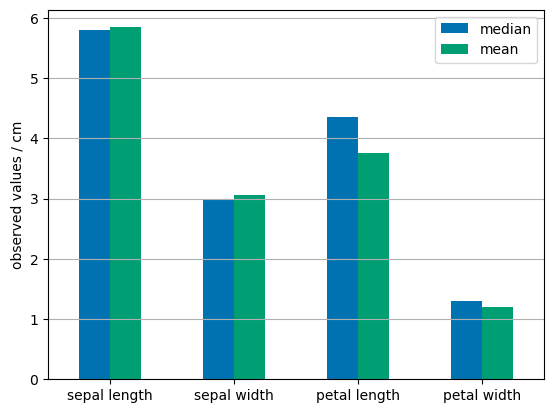

In [49]:
ax = (
    df_iris
    .describe()
    .loc[['50%', 'mean']]
    .rename(index={'50%': 'median'})
    .transpose()
    .plot.bar(
        ylabel="observed values / cm",
        rot=0
    )
).yaxis.grid(True)

(
    df_iris
    .describe()
    .loc[['50%', 'mean']]
    .rename(index={'50%': 'median'})
    .transpose()
)

## Operations

Now we deal with methods we already know from the [section on manipulation `Series` objects](series-methods-manipulation). We discuss these in the context of `DataFrame`s but will also learn about some new methods as well.

The general principle of manipulating a `DataFrame` with a method call is shown in the following sketch.

![Manipulating a `DataFrame` with a method call](../../_build_img/PandasDataFrameTransform-1.png)

(dataframes-operations-apply)=
### `.apply()`

`.apply()` is an odd creature. Well will soon see that its return type *depends on the callable we pass as argument*. For some reason `.apply()` appears to be first method that comes into people's mind when you ask them about a method that can be used to manipulate a `DataFrame`. Even though, there are often much better methods. But anyway, let's see what this method has to offer.

We start by partly emulating `.agg()`.

In [50]:
(
    df_iris
    .select_dtypes(exclude='object')
    .apply(
        lambda s: s.mean()
    )
)

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

That is not too surprising. We pass a reducing function that is applied to each columns (which is a `Series`) and get back a `Series` containing the result --- the same result would have been obtained with `df_iris.mean(numeric_only=True, axis="rows")` or `df_iris.select_dtypes("number").agg("mean")`.

Awkwardly enough, it is also possible to do the following: We make the `lambda` function return a `tuple` with results. We then get back a `DataFrame` where each row contains the results for a particular method call evaluated on all numerical columns of `df_iris`. Note that we [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) the index to better be able to compare the result with `.agg()` in the cell below.

:::{note} If you have not seen an expression like that in the `.rename()` method be informed that this is known as a `dict`ionary comprehension (similar to a `list` comprehension but with the goal of creating a `dict`).

```python
>>> {idx: s for idx, s in enumerate(("a", "b", "c"))}
{0: 'a', 1: 'b', 2: 'c'}
```

This equivalent --- but much more compact and elegant --- to 

```python
>>> d = {}
>>> for idx, s in enumerate(("a", "b", "c")):
...     d[idx] = s
... 
>>> d
{0: 'a', 1: 'b', 2: 'c'}
```
:::

In [53]:
(
    df_iris
    .select_dtypes('number')
    .apply(lambda s: (s.mean(), s.std(), s.min(), s.max()))
    .rename(index={idx: name for idx, name in enumerate(['mean', 'std', 'min', 'max'])})
)

,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
(
    df_iris
    .select_dtypes('number')
    .agg(['mean', 'std', 'min', 'max'])
)

,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


Remembering our discussion of `.apply()` with `Series` we recall that this method can also transform. Let's convert the units for the measured lengths and widths from cm to mm units.

In [56]:
df_iris.apply(
    lambda s: s if s.dtype == np.dtype('object') else s*10
)

,sepal length,sepal width,petal length,petal width,species
0,51.0,35.0,14.0,2.0,Iris-setosa
1,49.0,30.0,14.0,2.0,Iris-setosa
2,47.0,32.0,13.0,2.0,Iris-setosa
3,46.0,31.0,15.0,2.0,Iris-setosa
4,50.0,36.0,14.0,2.0,Iris-setosa
...,...,...,...,...,...
145,67.0,30.0,52.0,23.0,Iris-virginica
146,63.0,25.0,50.0,19.0,Iris-virginica
147,65.0,30.0,52.0,20.0,Iris-virginica
148,62.0,34.0,54.0,23.0,Iris-virginica


Indeed, we're doing a bit more here than what promised above. Taking a closer look at the `lambda` function we note the conditional return value. If the `dtype` of the column is `object` we return it as is; otherwise it must be a column with numerical `dtype` and we may safely multiply the by 10 (which converts from cm to mm units).

This is quite economical moment to show you how to convert a column's `dtype`. This is motivated by the fact that, when converted to mm units, the content of the sepal length, sepal width, petal length, and petal width columns can be represented as integers. Let's quickly convince ourselves that this is true:

In [58]:
(
    df_iris
    .select_dtypes('number')
    .mul(10)
    .apply(lambda s: (
           s
            .sub(s.round()))
            .pow(2)
            .sum()
          )
)

sepal length    0.0
sepal width     0.0
petal length    0.0
petal width     0.0
dtype: float64

Yes, I know this looks quite complicated but let us explain: First we grab all columns with numerical data type and multiply the whole `DataFrame` by 10 (conversion to mm units). Next we `.apply()` an reducing operation to each columns: We take each columns, subtract the columns with all entries rounded to the nearest integer value (`s.sub(s.round())`), then we square the difference (`.pow(2)`), and finally reduce to by computing the )mean (`.mean()`). Essentially, we have computed the *mean squared error* (MSE) for the each column $k$ of size $N$:

$$
\mathrm{MSE}^{(k)} = \frac{1}{N}\sum_{i = 0}^{N - 1} \left(s^{(k)}_i - \operatorname{round}\left(s^{(k)}_i\right)\right)^2
$$

Okay, so we can represent the values in the numeric columns as integers when they are in mm units. Then, how do we make the type conversion? We use the [`.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method for this. We will use an unsigned 8 bit integer for this. 

* Why unsigned? Well, because lengths / widths should be strictly $\geq$0 and therefore we do not need a sign.
* Why just 8 bits? 8 bits are sufficient to represent numbers from 0 ... 255 (unsigned!). The largest values per column are ...

In [59]:
df_iris.select_dtypes('number').mul(10).describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,58.433333,30.540000,37.586667,11.986667
std,8.280661,4.335943,17.644204,7.631607
min,43.000000,20.000000,10.000000,1.000000
25%,51.000000,28.000000,16.000000,3.000000
50%,58.000000,30.000000,43.500000,13.000000
75%,64.000000,33.000000,51.000000,18.000000
max,79.000000,44.000000,69.000000,25.000000


In [67]:
df_iris_mm = df_iris.apply(
            lambda s: s if s.dtype == np.dtype('object') else s*10
    ).astype(
    {
        cname: "uint8"
        for cname, dtype in df_iris.dtypes.items()
        if dtype != np.dtype('object')
    }
)
df_iris_mm

,sepal length,sepal width,petal length,petal width,species
0,51,35,14,2,Iris-setosa
1,49,30,14,2,Iris-setosa
2,47,32,13,2,Iris-setosa
3,46,31,15,2,Iris-setosa
4,50,36,14,2,Iris-setosa
...,...,...,...,...,...
145,67,30,52,23,Iris-virginica
146,63,25,50,19,Iris-virginica
147,65,30,52,20,Iris-virginica
148,62,34,54,23,Iris-virginica


In [64]:
df_iris.info(), df_iris_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal length  150 non-null    uint8 
 1   sepal width   150 non-null    uint8 
 2   petal length  150 non-null    uint8 
 3   petal width   150 non-null    uint8 
 4   species       150 non-null    object
dtypes: object(1), uint8(4)
memory usage: 1.9+ KB


(None, None)

Admittedly, we have gotten a bit off topic but I think we have learned some interesting an useful things along the way. Let's summarize this section with a warning.

:::{warning}Mind what kind of functions you pass to the `.apply()` method. If the functions reduces, the result will be a `Series` (containing e.g. mean values); if the function transforms ---  i.e., it takes a column and returns a column of the same size but with modified content --- the result will be a `DataFrame`. Hence, `.apply()` fails to have clear semantics and in many cases resorting to methods like `.agg()` or `.transform()` (covered below) is a better option.
:::

(dataframes-operations-transform)=
### `.transform()`

Recalling the [previous section](dataframes-operations-apply) on `.apply()` we can ask what `.transform()` has to offer us. Well, for the most part the method is much clearer about what it mean to accomplish: Transforming a `DataFrame`'s content by operating on the columns.

:::{note}Remember the [discussion](series-operations-transform-and-apply) of this method in the context of `Series`: `.transform()` will complain if the function passed to it does *not* "transform" (e.g. if it reduces by computing the mean or something similar).
:::

We repeat the conversion from cm to mm from before.

In [68]:
df_iris.transform(
    lambda s: s if s.dtype == np.dtype('object') else s*10
)

,sepal length,sepal width,petal length,petal width,species
0,51.0,35.0,14.0,2.0,Iris-setosa
1,49.0,30.0,14.0,2.0,Iris-setosa
2,47.0,32.0,13.0,2.0,Iris-setosa
3,46.0,31.0,15.0,2.0,Iris-setosa
4,50.0,36.0,14.0,2.0,Iris-setosa
...,...,...,...,...,...
145,67.0,30.0,52.0,23.0,Iris-virginica
146,63.0,25.0,50.0,19.0,Iris-virginica
147,65.0,30.0,52.0,20.0,Iris-virginica
148,62.0,34.0,54.0,23.0,Iris-virginica


As another application, let's center each column on its mean an scale it to have unit variance (also called [standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). We call the `.agg()` method right after to assure not to have made a mistake.

In [70]:
(
    df_iris
    .drop(columns=['species'])
    .transform(lambda s:
              s
              .sub(s.mean())
              .div(s.std())
              )
    .describe()
)

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-6.158037e-16,1.894781e-16,-1.894781e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


For a better understanding of the operations, let's take apart the computational steps involved. What we want to implement is the following. We want to replace the $k$-th column of size $N - 1$ like so:

$$
s^{(k)}_i \to \frac{s^{(k)}_i - \operatorname{mean}\left(s^{(k)}\right)}{\operatorname{std}\left(s^{(k)}\right)}, \quad i = 0, \dots, N - 1
$$

1. From each column subtract the mean value: `s.sub(s.mean())`
2. Divide by the standard deviation: `.div(s.std())`

The whole expression could have also been written like 

```python
>>> (s - s.mean()) / s.std()
```

It often useful to visualize the results.

:::{note} Due to scaling with the standard deviation the lengths and widths do *not* carry a unit anymore.
:::

array([[<Axes: xlabel='scaled values', ylabel='Frequency'>],
       [<Axes: xlabel='scaled values', ylabel='Frequency'>],
       [<Axes: xlabel='scaled values', ylabel='Frequency'>],
       [<Axes: xlabel='scaled values', ylabel='Frequency'>]], dtype=object)

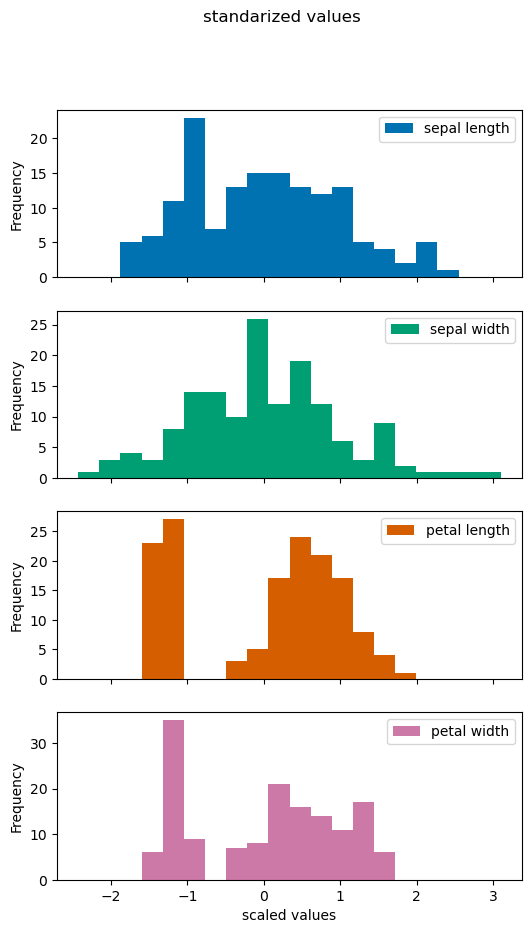

In [71]:
(
    df_iris
    .drop(columns=['species'])
    .transform(lambda s:
              s
              .sub(s.mean())
              .div(s.std())
              )
    .plot.hist(
        subplots=True,
        layout=(4, 1),
        figsize=(6, 10),
        sharex=True,
        bins=20,
        xlabel="scaled values",
        title="standarized values",
    )
)

:::{note} I hope by now we actually have convinced you that method chaining indeed is cool. Very often, when working on a data science project, this will be part of your workflow --- in particular during EDA. "Massage" the data contained in your `DataFrame` by chaining suitable methods calls and then visualize it right away.
:::

We close the discussion about `.transform()` by noting that is also possible to pass column-specific transformations in a `dict`. In the following we scale the sepal width by a factor of 10 and standardize the sepal length column.

In [75]:
(
    df_iris
    .transform(
        {
            "sepal length": lambda s: s.sub(s.mean()).div(s.std()),
            "sepal width": lambda s: s.mul(10)
        }
    )
).sample(5)

,sepal length,sepal width
84,-0.535384,30.0
135,2.242172,30.0
80,-0.414621,24.0
143,1.155302,32.0
60,-1.018437,20.0


### Quiz

<span style="display:none" id="7_DataFramesOperations:4">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGNhbiBiZSBjb25zaWRlcmVkIHRydWUgZm9yIHRoZSBgLmFwcGx5KClgIG1ldGhvZC4iLCAiYW5zd2VycyI6IFt7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJJdCBjYW4gb25seSB0cmFuc2Zvcm0gY29sdW1ucyBhbmQgcmV0dXJuIGFub3RoZXIgYERhdGFGcmFtZWAuIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIkl0IGNhbiBvbmx5IHBlcmZvcm0gcmVkdWN0aW9ucy4gVGhlIHJlc3VsdCBhbHdheXMgaXMgYSBgU2VyaWVzYC4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJJdCBjYW4gcGVyZm9ybSByZWR1Y3Rpb25zIGFuZCB0cmFuc2Zvcm1hdGlvbnMuIFRoZSB0eXBlIG9mIHRoZSBvdXRwdXQgZGVwZW5kcyBvbiB0aGUgY2FsbGFibGUgdGhhdCBpcyBwYXNzZWQuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiVGhlIG1ldGhvZCBpcyB2ZXJ5IGdlbmVyaWMgYW5kIGxhY2tzIGNsZWFyIHNlbWFudGljcy4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJUaGVyZSBvZnRlbiBtaWdodCBiZSBhIGJldHRlciBjaG9pY2UgdG8gYWNjb21wbGlzaCB0aGUgc2FtZSB0aGluZy4ifV19XQ==</span>

In [76]:

jupyterquiz.display_quiz("#7_DataFramesOperations:4")

<IPython.core.display.Javascript object>

<span style="display:none" id="7_DataFramesOperations:5">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGljaCBvZiB0aGUgZm9sbG93aW5nIHN0YXRlbWVudHMgYWJvdXQgYC50cmFuc2Zvcm0oKWAgYW5kIGAuYXBwbHkoKWAgYXJlIHdyb25nPyIsICJhbnN3ZXJzIjogW3siY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogImAudHJhbnNmb3JtKClgIG1ldGhvZCB3aWxsIGByYWlzZWAgYW4gZXhjZXB0aW9uIGlmIHRoZSBwYXNzZWQgY2FsbGFibGUgZG9lcyBub3QgdHJhbnNmb3JtIHdoaWxlIGAuYXBwbHlgIHdpbGwgbm90LiJ9LCB7ImNvcnJlY3QiOiBmYWxzZSwgImFuc3dlciI6ICJgLnRyYW5zZm9ybSgpYCBjbGVhcmx5IGV4cHJlc3NlcyBpdHMgcHVycG9zZSB3aGlsZSBgLmFwcGx5KClgIG1lcmVseSBzdWdnZXN0cyBpdCB3aWxsIGFwcGx5IGEgZnVuY3Rpb24gdG8gdGhlIGNvbHVtbnMuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiYC50cmFuc2Zvcm0oKWAgY2Fubm90IG9wZXJhdGUgYWxvbmcgdGhlIGNvbHVtbnMgd2hpbGUgYC5hcHBseSgpYCBjYW4uIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiYC50cmFuc2Zvcm0oKWAgaXMgYSBkcm9wLWluIHJlcGxhY2VtZW50IGZvciBhbGwgcG9zc2libGUgdXNlLWNhc2VzIG9mIGAuYXBwbHkoKWAuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiYC50cmFuc2Zvcm0oKWAgYXMgd2VsbCBhcyBhIGAuYXBwbHkoKWAgYXJlIGxpc3RlZCBhcyBkZXByZWNhdGVkIGluIHRoZSBQYW5kYXMgZG9jdW1lbnRhdGlvbi4ifV19XQ==</span>

In [77]:

jupyterquiz.display_quiz("#7_DataFramesOperations:5")

<IPython.core.display.Javascript object>

You are given the following expression:

```python
>>> (
    df_iris.drop(columns=["species"])
    .transform({
        "petal length": lambda s: s.sub(s.mean()).div(s.std()),
        "petal width": lambda s: s.mul(10),
    })
)
```

<span style="display:none" id="7_DataFramesOperations:6">W3sidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJfY29scyI6IDEsICJxdWVzdGlvbiI6ICJXaGF0IGlzIHRoZSByZXN1bHQgb2YgdGhpcyBleHByZXNzaW9uPyIsICJhbnN3ZXJzIjogW3siY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIlRoZSByZXN1bHQgaXMgYSBgU2VyaWVzYC4ifSwgeyJjb3JyZWN0IjogdHJ1ZSwgImFuc3dlciI6ICJUaGUgcmVzdWx0IGlzIGEgbmV3IGBEYXRhRnJhbWVgIHRoYXQgZG9lcyBub3Qgc2hhcmUgbWVtb3J5IHdpdGggdGhlIG9sZCBvbmUuIn0sIHsiY29ycmVjdCI6IHRydWUsICJhbnN3ZXIiOiAiVGhlIHJlc3VsdCBpcyBhIGBEYXRhRnJhbWVgIHRoYXQgaGFzIGNvbHVtbnMgd2l0aCBuYW1lcyAncGV0YWwgbGVuZ3RoJyBhbmQgJ3BldGFsIHdpZHRoJy4gVGhlIG90aGVyIGNvbHVtbnMgZnJvbSBgZGZfaXJpc2AgYXJlIG5vdCBhdmFpbGFibGUgYW55bW9yZS4ifSwgeyJjb3JyZWN0IjogZmFsc2UsICJhbnN3ZXIiOiAiVGhlIHJlc3VsdCBpcyBhIGBEYXRhRnJhbWVgIHRoYXQgaGFzIGNvbHVtbnMgd2l0aCBuYW1lcyAncGV0YWwgbGVuZ3RoJyBhbmQgJ3BldGFsIHdpZHRoJy4gVGhlIG90aGVyIGNvbHVtbnMgZnJvbSBgZGZfaXJpc2AgYXJlIHN0aWxsIGF2YWlsYWJsZSBpbiB0aGUgYERhdGFGcmFtZWAuIn0sIHsiY29ycmVjdCI6IGZhbHNlLCAiYW5zd2VyIjogIlRoZSByZXN1bHQgaXMgdGhlIG9sZCBgRGF0YUZyYW1lYCB3aGVyZSB0aGUgc3BlY2lmaWVkIGNvbHVtbnMgaGF2ZSBiZWVuIG92ZXJyaWRkZW4uIn1dfV0=</span>

In [78]:

jupyterquiz.display_quiz("#7_DataFramesOperations:6")

<IPython.core.display.Javascript object>

In [79]:
(
    df_iris.drop(columns=["species"])
    .transform({
        "petal length": lambda s: s.sub(s.mean()).div(s.std()),
        "petal width": lambda s: s.mul(10),
    })
)

,petal length,petal width
0,-1.336794,2.0
1,-1.336794,2.0
2,-1.393470,2.0
3,-1.280118,2.0
4,-1.336794,2.0
...,...,...
145,0.816888,23.0
146,0.703536,19.0
147,0.816888,20.0
148,0.930239,23.0


### Exercises

#### Removing columns

Come up with three  *different* ways to return a `DataFrame` from `df_iris` without the columns `"petal length"` and `"petal width"`.

In [81]:
df_iris.filter(regex="(species|sepal)").sample(5)

,sepal length,sepal width,species
144,6.7,3.3,Iris-virginica
92,5.8,2.6,Iris-versicolor
14,5.8,4.0,Iris-setosa
93,5.0,2.3,Iris-versicolor
23,5.1,3.3,Iris-setosa


In [82]:
df_iris.drop(columns=['petal length', 'petal width']).sample(5)

,sepal length,sepal width,species
24,4.8,3.4,Iris-setosa
132,6.4,2.8,Iris-virginica
64,5.6,2.9,Iris-versicolor
126,6.2,2.8,Iris-virginica
25,5.0,3.0,Iris-setosa


In [83]:
df_iris[df_iris.columns.difference(['petal length', 'petal width'])].sample(5)

,sepal length,sepal width,species
120,6.9,3.2,Iris-virginica
0,5.1,3.5,Iris-setosa
122,7.7,2.8,Iris-virginica
148,6.2,3.4,Iris-virginica
32,5.2,4.1,Iris-setosa


#### Rounding

Recall the situation above in which we tested if the measured values indeed can be represented as integers when converted to mm units.

In [84]:
(
    df_iris.select_dtypes("number")
    .mul(10)
    .apply(lambda s: s.sub(s.round()).pow(2).mean())
)

sepal length    0.0
sepal width     0.0
petal length    0.0
petal width     0.0
dtype: float64

Repeat the same computational steps but *without* the `.apply()` method (yes, using the `.transform()` method is also not allowed). Instead, operate on the *whole* `DataFrame`.

*Hint*
* Have a look at the [`.pipe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html) method. This method can be called with a `lambda` function.

In [87]:
(
    df_iris.select_dtypes("number")
    .mul(10)
    .pipe(lambda df_:df_ - df_.round())
    .pow(2)
    .mean(axis='rows')
)

sepal length    0.0
sepal width     0.0
petal length    0.0
petal width     0.0
dtype: float64

#### Operate along the columns with `.apply()`

The [`.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas-dataframe-apply) method has an optional `axis` parameter that defaults to `axis = 0`, i.e., by default this method operates --- and this can be a reduction or a transformation --- along the *rows*. In this exercise you are asked to operate along the *columns*.

We revisit the task to standardizing the numeric columns of the Iris dataset. The procedure follows the equation

$$
s^{(k)}_i \to \frac{s^{(k)}_i - \operatorname{mean}\left(s^{(k)}\right)}{\operatorname{std}\left(s^{(k)}\right)}, \quad i = 0, \dots, N - 1.
$$

Above we have implemented this by means of the `.transform()` method. Now use `.apply()` and operate row-wise and check that the data actually is normalized. Afterward visualize the results as boxplots.

*Hint*

It may to help to compute the mean and the standard deviation for each numeric column first.

Standardize and 

In [91]:
column_names = df_iris.columns.difference(['species'])

df_agg = df_iris[column_names].agg(['mean', 'std'])

df_iris_standardized = df_iris[column_names].apply(
    lambda x: (x - df_agg.loc['mean']) / df_agg.loc['std'],
    axis="columns"
    )
df_agg, df_iris_standardized.sample(5)

(      petal length  petal width  sepal length  sepal width
 mean      3.758667     1.198667      5.843333     3.054000
 std       1.764420     0.763161      0.828066     0.433594,
      petal length  petal width  sepal length  sepal width
 56       0.533509     0.525883      0.551486     0.567351
 38      -1.393470    -1.308593     -1.743017    -0.124540
 66       0.420157     0.394849     -0.293857    -0.124540
 102      1.213619     1.181053      1.517592    -0.124540
 99       0.193454     0.132781     -0.173094    -0.585801)

Visualize the results as boxplots.

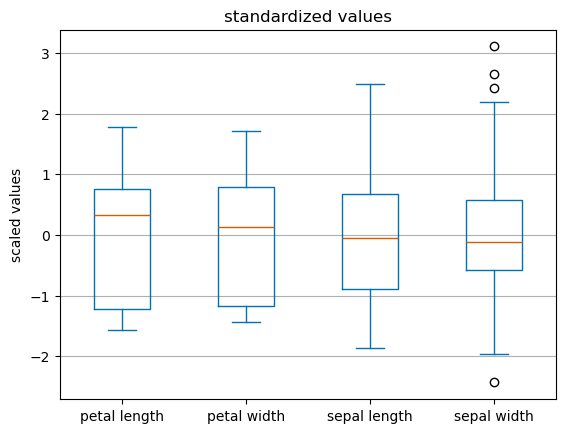

In [93]:
(
    df_iris_standardized.plot.box(
        ylabel="scaled values",
        title="standardized values"
    )
).yaxis.grid(True)

(dataframes-operations-adding-new-columns-1)=
#### Adding new columns 1

For this exercise we need working copy.

In [94]:
df_iris_work = df_iris.copy(deep=True)

We know how to access a single column of a `DataFrame`.

In [95]:
df_iris_work["species"].sample(10)

30         Iris-setosa
113     Iris-virginica
54     Iris-versicolor
142     Iris-virginica
140     Iris-virginica
9          Iris-setosa
122     Iris-virginica
80     Iris-versicolor
125     Iris-virginica
79     Iris-versicolor
Name: species, dtype: object

Indeed, this syntax can be used to *add* new columns to a `DataFrame`:

```python
>>> df_iris_["name of some new column"] = ... # expression that returns a `Series`
```

:::{warning} The `Series` to be stored in the new column must have the same length as the other columns in the `DataFrame`.
:::

:::{warning} Below we will learn about a better method to add new columns to a `DataFrame`. The issue with the current method is that we tend to "clutter" our (original?) `DataFrame` with columns we might *not* want to keep all the time. Indeed, often (not always, though) new columns are *intermediate* results we need e.g. for some particular visualization. Therefore, it is not worthwhile keeping the column(s) around after we're done with that part of our analysis.
:::

Add new columns with names `"sepal ratio"` and `"petal ratio"`. Each of these columns contains the ratio of the measurements of the widths and lengths for sepals and petals, respectively. Afterwards plot the `"sepal ratio"` against the `"petal ratio"` in a scatter plot. Distinguish the different species setosa, versicolor, and virginica with different colors.

In [97]:
df_iris_work['sepal ratio'] = df_iris_work['sepal width'] / df_iris_work['sepal length']
df_iris_work['petal ratio'] = df_iris_work['petal width'] / df_iris_work['petal length']

df_iris_work.sample(5)

,sepal length,sepal width,petal length,petal width,species,sepal ratio,petal ratio
27,5.2,3.5,1.5,0.2,Iris-setosa,0.673077,0.133333
88,5.6,3.0,4.1,1.3,Iris-versicolor,0.535714,0.317073
120,6.9,3.2,5.7,2.3,Iris-virginica,0.463768,0.403509
17,5.1,3.5,1.4,0.3,Iris-setosa,0.686275,0.214286
9,4.9,3.1,1.5,0.1,Iris-setosa,0.632653,0.066667


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

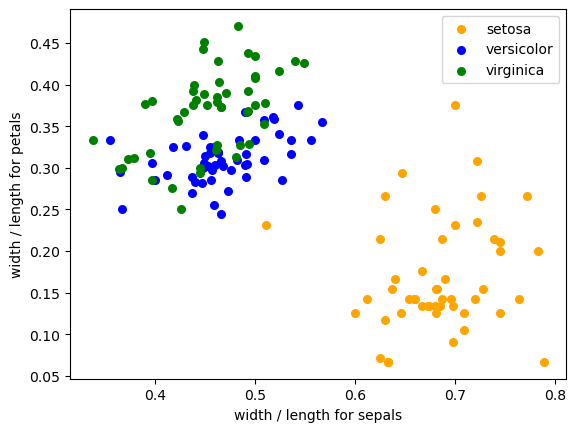

In [102]:
fig, ax = plt.subplots()

for s, color in zip(
    df_iris_work['species'].unique(), ('orange', 'blue', 'green')
):
    (
        df_iris_work.loc[lambda df_: df_['species'] == s].plot.scatter(
            ax=ax,
            x='sepal ratio',
            y='petal ratio',
            xlabel="width / length for sepals",
            ylabel="width / length for petals",
            label=s.split('-')[-1],
            legend=True,
            c=color,
            s=30,
        )
    )

df_iris_work['species'].unique()

#### Adding new columns 2

Solve the task from the [previous exercise](dataframes-operations-adding-new-columns-1) using the `.assign()` method.

[Text(1, 0, 'Iris-setosa'),
 Text(1, 1, 'Iris-versicolor'),
 Text(1, 2, 'Iris-virginica')]

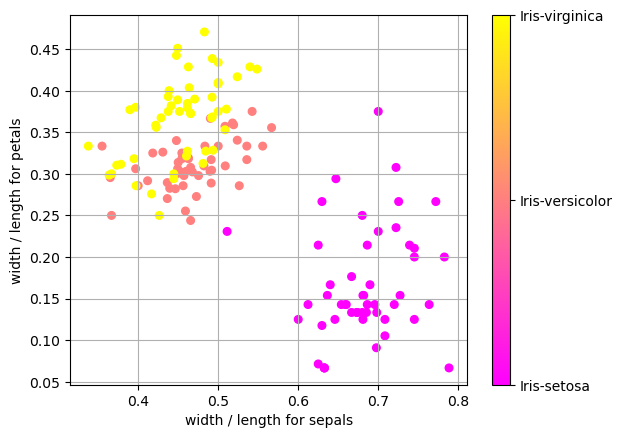

In [116]:
fig, ax = plt.subplots()

(
    df_iris.assign(
        **{
            'sepal ratio' : df_iris['sepal width'] / df_iris['sepal length'],
            'petal ratio' : df_iris['petal width'] / df_iris['petal length'],
        }
    ).plot.scatter(
        ax=ax,
        x='sepal ratio',
        y='petal ratio',
        xlabel="width / length for sepals",
        ylabel="width / length for petals",
        legend=True,
        c=df_iris['species'].astype('category').cat.codes,
        cmap='spring',
        grid=True,
        s=30,
    )
)

cbax = fig.get_axes()[-1]
cbax.set_yticks(range(0, 3))
cbax.set_yticklabels(df_iris['species'].astype('category').cat.categories)

#### Filtering rows

Retrieve all rows from `df_iris` that contain the entry `"Iris-setosa'"` in the `"species"` column. Obtain the rows in two different ways. Additionally compute some basics statistics for this subset of data (e.g. mean, std, median, ...).

1. Make the `"species"` column the index and select the corresponding rows. Inspect the [`DataFrame` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) for suitable methods.

In [119]:
(
    df_iris
    .set_index('species')
    .loc['Iris-setosa']
    .describe()
)

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


2. Use the [`.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method.

In [121]:
(
    df_iris
    .query(
        "species == 'Iris-setosa'"
    )
    .describe()
)

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


(dataframes-operations-grouping)=
## Grouping

Oftentimes items in a dataset can be *grouped* in a certain manner (e.g., if a column contains a value multiple times). The Iris dataset, for instance, can be grouped according the species of each flower. This allows to easily extract group-related information.

Pandas `DataFrame`s provide the [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method to group a `DataFrame` with respect to one or multiple columns. 

```python
>>> df.groupby(by=["<column label>"])
```

The `DataFrame` is split and entries (rows) are grouped according to the values in the column with `"<column-label>"`. Once the data  has been grouped operations can be conducted on the items of each group. In this context it is important to note that grouping does *not* actually split the into new `DataFrame`s. That is, we do not end up with a bunch of new `DataFrame`s that consume additional memory. `.groupby()` returns an object of type `DataFrameGroupBy` that internally maintains all required information to establish the grouping (grouping is done "lazily"). It is important to understand that such an object essentially is a special *view* on the original `DataFrame`. No computations have been carried out when generating it (lazy evaluation).

The basic idea of grouping with respect to a single column is sketched in the following.

![Group `DataFrame` by single columns](../../_build_img/PandasDataFrameGroupBy-1.png)

The Iris dataset is naturally grouped according to the `"species"` column.

In [ ]:
# Fill the gap!

This data structure still knows about the columns that were present in the original `DataFrame`. We can use the `[<column-name>]` operation to access the columns with the corresponding label in each of the group members (subframes).

In [ ]:
# Fill the gap!

In [ ]:
# Fill the gap!

`grouped_by_species` actually is iterable which we can use to get a glimpse under the hood.

In [ ]:
# Fill the gap!

The subframes can be accessed directly with the [`.get_group("<a valid group name>")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.get_group.html#pandas.core.groupby.DataFrameGroupBy.get_group) method. The allowed names are the entries of the column according to which the data has been grouped. The method actually returns a `DataFrame`.

In [ ]:
# Fill the gap!

Other methods for operating on grouped objects are documented [here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html).

One of the things that makes grouped objects so convenient is that we can still use many of the methods that we know from `Series` and `DataFrame`s. 

In [ ]:
# Fill the gap!

By inspecting the result we see that the `.agg()` method is applied to all subframes (all groups). We can *think* of every operation passed to the aggregation method as returning a `Series` object containing the names of the groups as index; each of these `Series` constitutes a column in the resulting `DataFrame`. The method calls are called on the `DataFrameGroupBy` (or `SeriesGroupBy`) object but are *forwarded* to the subframes (or subseries). The following therefore is a valid method call.


In [ ]:
# Fill the gap!

You will not be surprised that, starting from a grouped object, we can generate some interesting plots. For example, this chained call of several methods creates a plot that allows to nicely compare the mean value of lenghts and widths between all species (Iris setosa, Iris versicolor, and Iris viriginica). Note that we have [`.transpose()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html)d the the `DataFrame` from above to get a plot where the measured quantities are on the x-axis. Otherwise, the names of the species would have been the labels on this axis.

In [ ]:
# Fill the gap!

More or less as an aside, consider the following code. We use a [`.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to reshape the original `DataFrame` in the same manner as with `.groupby()` above. While there are other important parameters, we limit ourselves to `columns` and `aggfunc` in this examples.

* `columns`: Specifies the columns from `df_iris` of which we want the unique entries to the be column labels of the resulting `DataFrame`. Internally, grouping happens with respect to this column. Values within each group are reduced (aggregated) with the specified `aggfunc`. In each of the remaining numeric columns (containing the sepal length, sepal width, petal length and petal width) groups of values are established according the entries in `"species"`; aggregation is carried out in each group in each column.
* `aggfunc`: Specifies the type of aggregation, .e.g. "sum", "mean", "std", or "median".

In [ ]:
# Fill the gap!

For completeness, we create the same plot as above.

In [ ]:
# Fill the gap!

Below we show a sketch of how a pivot table works (in Pandas).

![Pandas pivot table](../../_build_img/PandasDataFramePivotTable-1.png)

Here is the example from the sketch in code.

In [ ]:
# Fill the gap!

### Exercises

#### Pivoting

Modify the call to `.pivot_table()` from above in such a manner that the plot has the species on the x-axis. In more detail, the use `.pivot_table()` to generate the *transposed* version the `DataFrame` used to generate the plot above. And no, the solution is *not* to call `.transpose()` on the `DataFrame`. Rather, have a closer look at the [`.pivot_table()` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) and adapt the method call accordingly.


In [ ]:
# Fill the gap!

#### Box plots

Use the `.groupby()` method to create boxplots of the spread of each measured quantity (sepal length, sepal width, petal length, and petal width). Create separate plot for each specie Iris setosa, Iris versicolor, and Iris virginica. The plots should share the same y-scale and have horizontal grid lines (y-axis).

In [ ]:
# Fill the gap!

#### Standardization

Use the `.groupby()` method to apply standardization within each group belonging to a species. That implies that the group mean and standard deviation are used to shift and scale the values in each group.

The equation used to normalize each "feature" ($k \in $(sepal length, sepal width, petal length, petal width)) are repeated here for your convenience:

$$
s^{(k, G)}_i \to \frac{s^{(k, G)}_i - \operatorname{mean}\left(s^{(k, G)}\right)}{\operatorname{std}\left(s^{(k, G)}\right)}, \quad i = 0, \dots, N_G - 1,
$$

where $G$ is an additional index for the groups (which are Iris setosa, Iris versicolor, and Iris virginica).

Implement this group-based standardization  

1. using the [`.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.apply.html) method, and
2. using the [`.transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) method.

In both cases very that the standarization yields the expected result with zero (per-group) mean value and unit (per-group) variance. Finally, visualize the standardized data in a suitable manner.

Group-based standardization with `.transform()`.

In [ ]:
# Fill the gap!

Group-based standardization with `.apply()`.

In [ ]:
# Fill the gap!

Visualization of group-based standardization.

In [ ]:
# Fill the gap!